In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import linprog

# Useful websites

<b>Explain how to find NE with LP</b><br>
https://cbom.atozmath.com/example/CBOM/GameTheory.aspx?he=e&q=lpp

<b>NE / LP solver</b><br>
https://linprog.com/en/main-simplex-method

# Some play-around

In [3]:
payoff_me = np.array([[3,-2], [-1,0]])
payoff_opp = np.array([[-3,2], [1,0]])

payoff_me

array([[ 3, -2],
       [-1,  0]])

In [6]:
# first make the payoff matrix >0 everywhere
# linear affine transformations (ax+b) are the only ones allowed

minVal = payoff_me.min()

M_me = payoff_me - minVal + 1
M_me

array([[6, 1],
       [2, 3]])

## Some notes on scipy linprog implementation

https://stackoverflow.com/questions/45873783/python-linprog-minimization-simplex-method

Key points:
* expects the problem to be formulated as a $minimization$ of the objective function
* expects the constraints to be formulated as $less$ (or equal). <br>
Therefore, if a constraint is formulated as >=, flip the corresponding signs in A and b


How to use LP to solve for NE: <br>
http://www.universalteacherpublications.com/univ/ebooks/or/Ch9/gamelp.htm

In [18]:
# https://stackoverflow.com/questions/45873783/python-linprog-minimization-simplex-method
A = np.array([[-6,-2], [-1, -3]])
b = np.array([-1,-1])
c = np.array([1,1])

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, 1))
if res.status == 0:
    print('Optimization successful')
    print('    Optimal value:', res.fun)
    print('    X:', res.x)

print()
print("Optimal strategy for P1: {:.6f} {:.6f}".format(res.x[0]/res.fun, res.x[1]/res.fun))

Optimization successful
    Optimal value: 0.3750000028835264
    X: [0.0625 0.3125]

Optimal strategy for P1: 0.166667 0.833333


# Actual Example

In [6]:
payoff_me = np.array([[3,-2], [-1,0]])
payoff_opp = np.array([[-3,2], [1,0]])

In [25]:
# coefficients for objective function
c = np.array([1,1])

# constraint formulation (as minimization)
minVal = payoff_me.min()
M_me = payoff_me - minVal + 1
A = (-1) * M_me.T
b = np.array([-1,-1])

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, 1))
if res.status == 0:
    print('Optimization successful')
    print('    Optimal value:', res.fun)
    print('    X:', res.x)

print()
print("Optimal strategy for P1: {:.6f} {:.6f}".format(res.x[0]/res.fun, res.x[1]/res.fun))

Optimization successful
    Optimal value: 0.3750000028835264
    X: [0.0625 0.3125]

Optimal strategy for P1: 0.166667 0.833333


In [29]:
# coefficients for objective function
c = np.array([1,1])

# constraint formulation (as minimization)
#minVal = payoff_opp.min()
#M_opp = payoff_opp - minVal + 1
#A = (-1) * M_opp.T
A = np.array([[1,6],[5,4]])*(-1)
b = np.array([-1,-1])

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, 1))
if res.status == 0:
    print('Optimization successful')
    print('    Optimal value:', res.fun)
    print('    X:', res.x)

print()
print("Optimal strategy for P1: {:.6f} {:.6f}".format(res.x[0]/res.fun, res.x[1]/res.fun))

Optimization successful
    Optimal value: 0.23076923083867107
    X: [0.07692308 0.15384615]

Optimal strategy for P1: 0.333333 0.666667


In [11]:
def find_NashEquilibrium(mtx_payoff, player):
    """
    find the NashEquilibrium based on the Normal represenation of the problem
        use linear programming approach to maximise value from game for player
            basic idea: for all pure strategies of opponent, find your own strategy that maximises value
        
        use scipy to solve this, which has few technical details
            1) constraints need to be expressed as less/greater than
                in the straightforward derivation of LP: those are expressed as >=
            2) depending on whether we solve for p1 or p2, need to handle payOff matrix differently
            3) ensure that all values in payoff matrix are positive (for LP formulation)
                note that any affine linear transformation (ax+b) applied to payoff matrix leaves NE intact
                ==> we can just add minValue+1 as that transformation
    
    mtx_payoff ... payoff matrix:
        player1 actions: as rows
        player2 actions: as cols
        
    player ... either 1 or 2
    """
    
    # linear transformation: make m_ij > 0
    minVal = mtx_payoff.min()
    mtx_M = mtx_payoff - minVal + 1

    # construct matrix containing constraints (formulated as <=)
    if player == 1:
        A = mtx_M.T * (-1)
    elif player == 2:
        A = mtx_M * (-1)
    else:
        raise ValueError(f"Player must be 1 or 2, but got {player}")
        
    # construct vector with constraint-values
    #  since we normalise by value, this is just a list of 1s
    #  because minimise rather than maximise --> *(-1)
    b = np.ones((1, A.shape[1])) * (-1)
    
    # coefficients for objective function
    #  by formulation as LP, where we normalise by value --> automatically a minimization
    c = np.ones((1, A.shape[1]))
    
    # solve the LP
    res_LP = linprog(c, A_ub=A, b_ub=b, bounds=(0, 1))
    if res_LP.status == 0:
        #print('Optimization successful')
        #print('    Optimal value:', res.fun)
        #print('    X:', res.x)
        
        # re-construct probabilities for each pure player strategy
        arr_prob = res_LP.x / res_LP.fun
        return arr_prob
    
    else:
        #print("Optimization failed")
        return None

In [14]:
payoff_p1 = np.array([[3,-2], [-1,0]])
payoff_p2 = np.array([[-3,2], [1,0]])

strategy_p1 = find_NashEquilibrium(mtx_payoff=payoff_p1, player=1)
strategy_p2 = find_NashEquilibrium(mtx_payoff=payoff_p2, player=2)

print("Strategy for player 1: ", strategy_p1)
print("Strategy for player 2: ", strategy_p2)

Strategy for player 1:  [0.16666667 0.83333333]
Strategy for player 2:  [0.33333333 0.66666667]


In [18]:
# Stag Hunt
payoff_p1 = np.array([[4,1], [3,2]])
payoff_p2 = np.array([[4,3], [1,2]])

strategy_p1 = find_NashEquilibrium(mtx_payoff=payoff_p1, player=1)
strategy_p2 = find_NashEquilibrium(mtx_payoff=payoff_p2, player=2)

print("Strategy for player 1: ", strategy_p1)
print("Strategy for player 2: ", strategy_p2)

Strategy for player 1:  [1.31682645e-12 1.00000000e+00]
Strategy for player 2:  [1.31682645e-12 1.00000000e+00]


In [19]:
# Prisoners dilemma
payoff_p1 = np.array([[2,0], [3,1]])
payoff_p2 = np.array([[2,3], [0,1]])

strategy_p1 = find_NashEquilibrium(mtx_payoff=payoff_p1, player=1)
strategy_p2 = find_NashEquilibrium(mtx_payoff=payoff_p2, player=2)

print("Strategy for player 1: ", strategy_p1)
print("Strategy for player 2: ", strategy_p2)

Strategy for player 1:  [2.5654097e-12 1.0000000e+00]
Strategy for player 2:  [2.5654097e-12 1.0000000e+00]


In [22]:
# Rock Paper Scissor
payoff_p1 = np.array([[0,0,1], [1,0,0], [0,1,0]])
payoff_p2 = np.array([[0,1,0], [0,0,1], [1,0,0]]) # equivalent to p1.T

strategy_p1 = find_NashEquilibrium(mtx_payoff=payoff_p1, player=1)
strategy_p2 = find_NashEquilibrium(mtx_payoff=payoff_p2, player=2)

print("Strategy for player 1: ", strategy_p1)
print("Strategy for player 2: ", strategy_p2)

Strategy for player 1:  [0.33333333 0.33333333 0.33333333]
Strategy for player 2:  [0.33333333 0.33333333 0.33333333]


In [25]:
# Rock Paper Scissor Lizard Spock
payoff_p1 = np.array([[0,0,1,1,0], 
                      [1,0,0,0,1], 
                      [0,1,0,1,0],
                      [0,1,0,0,1],
                      [1,0,1,0,0]])

payoff_p2 = payoff_p1.T

strategy_p1 = find_NashEquilibrium(mtx_payoff=payoff_p1, player=1)
strategy_p2 = find_NashEquilibrium(mtx_payoff=payoff_p2, player=2)

print("Strategy for player 1: ", strategy_p1)
print("Strategy for player 2: ", strategy_p2)

Strategy for player 1:  [0.2 0.2 0.2 0.2 0.2]
Strategy for player 2:  [0.2 0.2 0.2 0.2 0.2]


# Time the speed for finding the Nash equilibrium

Creating the payoff matrix takes time, do that separately

In [77]:
matrixSize = 2048

minVal=-10
maxVal=10

# Random payoff matrix
payoff_p1 = np.round(np.random.rand(matrixSize,matrixSize) * (maxVal-minVal) + minVal)
#payoff_p2 = (-1)*payoff_p1

In [78]:
%%time 

strategy_p1 = find_NashEquilibrium(mtx_payoff=payoff_p1, player=1)
#strategy_p2 = find_NashEquilibrium(mtx_payoff=payoff_p2, player=2)

print(np.sum(strategy_p1))
#print("Strategy for player 1: ", strategy_p1)
#print("Strategy for player 2: ", strategy_p2)

1.0
CPU times: user 17min 48s, sys: 1min 22s, total: 19min 11s
Wall time: 7min 49s


In [82]:
df_cpuTime = pd.DataFrame(
    index=[2,4,8,16,32,64,128,256,512,1024, 2048],
    data={"cpuTime": [0.021, 0.032, 0.029, 0.039, 0.371, 0.578, 1.22, 4.22, 23.3, 2*60+23, 7*60+49]})
df_cpuTime

,cpuTime
2,0.021
4,0.032
8,0.029
16,0.039
32,0.371
64,0.578
128,1.220
256,4.220
512,23.300
1024,143.000


<AxesSubplot:>

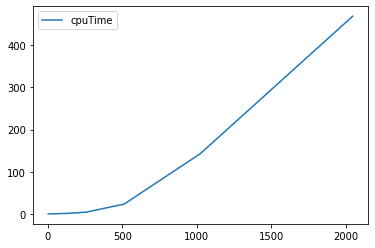

In [81]:
df_cpuTime.plot()